# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [577]:
import numpy as np
#import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
from matplotlib.image import imread
from scipy import ndimage
from scipy import signal
#from scipy.ndimage import gaussian_filter
%matplotlib inline

### Reading the Mosaic Image

In [578]:
def read_image(IMG_NAME):
   # YOUR CODE HERE
    img=mpimg.imread(IMG_NAME)
    return img

### Linear Interpolation

In [579]:
### HINT : You might want to use filters

In [580]:
### HINT : To use filters you might want to write your kernels

In [581]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [582]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [583]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    red=np.zeros(np.array(mosaic_img).shape)
    red[::2, ::2] = mosaic_img[::2, ::2]
    green=np.zeros(np.array(mosaic_img).shape)
    green[1::2, ::2] = mosaic_img[1::2, ::2]
    green[::2, 1::2] = mosaic_img[::2, 1::2]
    blue=np.zeros(np.array(mosaic_img).shape)
    blue[1::2, 1::2] = mosaic_img[1::2, 1::2] 
    
    k_green = np.array([[0,0.25,0],[0.25,0,0.25],[0,0.25,0]])
    conv_green=ndimage.convolve(green, k_green, mode='mirror')
    k_blue=np.array([[0.25,0.5,0.25],[0.5,0,0.5],[0.25,0.5,0.25]])
    conv_blue=ndimage.convolve(blue, k_blue, mode='mirror')
    k_red=np.array([[0.25,0.5,0.25],[0.5,0,0.5],[0.25,0.5,0.25]])
    conv_red=ndimage.convolve(red, k_red, mode='mirror')
    result_green=conv_green+green
    result_red=conv_red+red
    result_blue=conv_blue+blue
    
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    soln_image[:,:,0] =result_red
    soln_image[:,:,1] =result_green
    soln_image[:,:,2] =result_blue
    return soln_image

In [584]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    mosaic_shape = np.shape(mosaic_img)
    pp_err_map=np.zeros((mosaic_shape[0], mosaic_shape[1]))
    red_err=np.square(soln_image[:,:,0]-original_image[:,:,0])
    green_err=np.square(soln_image[:,:,1]-original_image[:,:,1])
    blue_err=np.square(soln_image[:,:,2]-original_image[:,:,2])
    pp_err_map=red_err+green_err+blue_err
    
    #print(pp_err_map)
    plt.imshow((pp_err_map).astype(np.uint8))
    plt.axis('off')
    
    pp_err=np.mean(pp_err_map)
    max_err=np.amax(pp_err_map)
    return pp_err, max_err

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

(-0.5, 599.5, 479.5, -0.5)

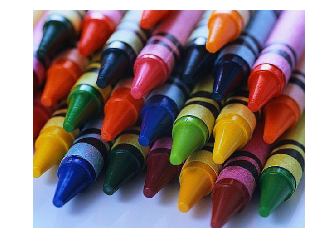

In [585]:
mosaic_img = read_image('images/crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('images/crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for crayons is: 151.91146419270834
The maximum per-pixel error for crayons is: 53478.125


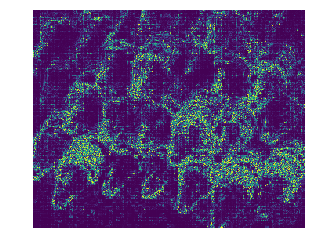

In [586]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 2381.5, 1439.5, -0.5)

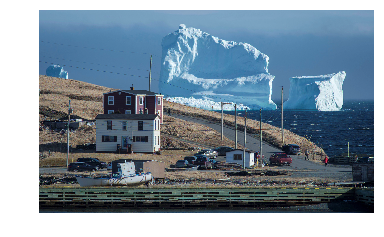

In [587]:
mosaic_img = read_image('images/iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('images/iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for iceberg is: 105.2289647216683
The maximum per-pixel error for iceberg is: 30197.3125


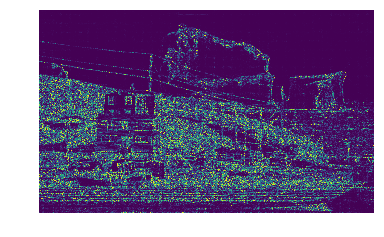

In [588]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

(-0.5, 1199.5, 799.5, -0.5)

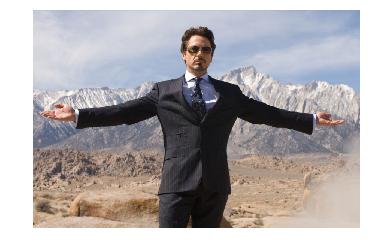

In [589]:
mosaic_img = read_image('images/tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('images/tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for tony is: 23.362575130208334
The maximum per-pixel error for tony is: 9817.8125


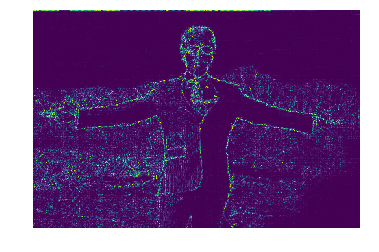

In [590]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

(-0.5, 969.5, 723.5, -0.5)

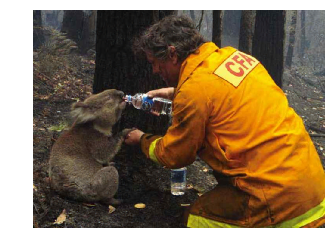

In [591]:
mosaic_img = read_image('images/hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [592]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    red=np.zeros(np.array(mosaic_img).shape)
    red[::2, ::2] = mosaic_img[::2, ::2]
    green=np.zeros(np.array(mosaic_img).shape)
    green[1::2, ::2] = mosaic_img[1::2, ::2]
    green[::2, 1::2] = mosaic_img[::2, 1::2]
    blue=np.zeros(np.array(mosaic_img).shape)
    blue[1::2, 1::2] = mosaic_img[1::2, 1::2] 
    
    k_green = np.array([[0,0.25,0],[0.25,0,0.25],[0,0.25,0]])
    conv_green=ndimage.convolve(green, k_green, mode='mirror')
    k_blue=np.array([[0.25,0.5,0.25],[0.5,0,0.5],[0.25,0.5,0.25]])
    conv_blue=ndimage.convolve(blue, k_blue, mode='mirror')
    k_red=np.array([[0.25,0.5,0.25],[0.5,0,0.5],[0.25,0.5,0.25]])
    conv_red=ndimage.convolve(red, k_red, mode='mirror')
    result_green=conv_green+green
    result_red=conv_red+red
    result_blue=conv_blue+blue

    filtered_red=result_green+scipy.signal.medfilt2d(result_red-result_green)
    filtered_blue=result_green+scipy.signal.medfilt2d(result_blue-result_green)
    
    mosaic_shape = np.shape(mosaic_img)
    freeman_soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    freeman_soln_image[:,:,0] =filtered_red
    freeman_soln_image[:,:,1] =result_green
    freeman_soln_image[:,:,2] =filtered_blue
    
    
    return freeman_soln_image

(-0.5, 599.5, 479.5, -0.5)

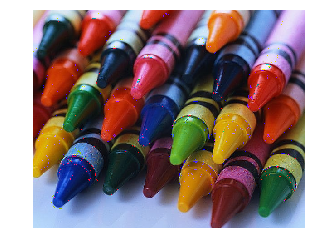

In [593]:
mosaic_img = read_image('images/crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for crayons is: 112.34364149305556
The maximum per-pixel error for crayons is: 47857.625


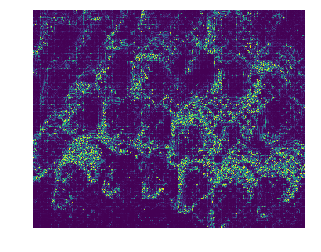

In [594]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 1199.5, 799.5, -0.5)

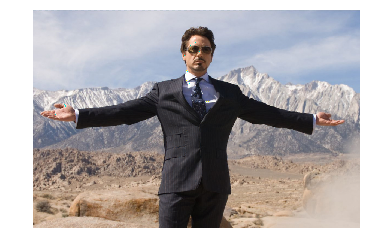

In [595]:
mosaic_img = read_image('images/tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for tony is: 15.508873828125
The maximum per-pixel error for tony is: 10873.5


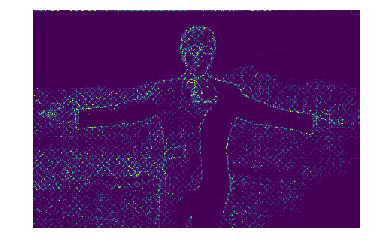

In [596]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

(-0.5, 2381.5, 1439.5, -0.5)

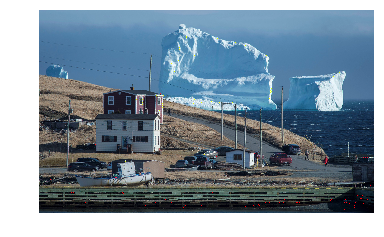

In [597]:
mosaic_img = read_image('images/iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for iceberg is: 67.79525049342872
The maximum per-pixel error for iceberg is: 33720.0625


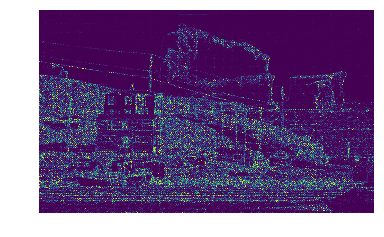

In [598]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

In [599]:
### Feel free to play around with other images for Freeman's method above ###

(-0.5, 969.5, 723.5, -0.5)

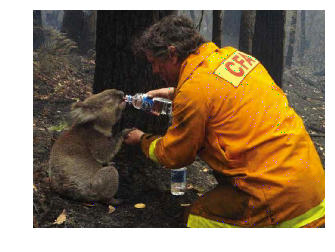

In [600]:
mosaic_img = read_image('images/hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [601]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    original_shape = np.shape(original_image)
    mosaic_img = np.zeros((original_shape[0], original_shape[1]))
    mosaic_img[::2, ::2] = original_image[::2, ::2,0]
    mosaic_img[1::2, ::2] = original_image[1::2, ::2,1]
    mosaic_img[::2, 1::2] = original_image[::2, 1::2,1]
    mosaic_img[1::2, 1::2] = original_image[1::2, 1::2,2]     
    return mosaic_img

(-0.5, 499.5, 499.5, -0.5)

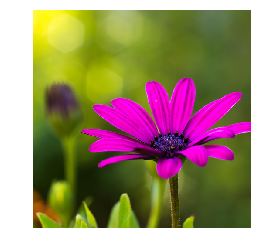

In [602]:
original_img = read_image('images/flower.jpg')
mosaic_img = get_mosaic_image(original_img)
recover_img=get_freeman_solution_image(mosaic_img)
plt.imshow((original_img).astype(np.uint8))
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

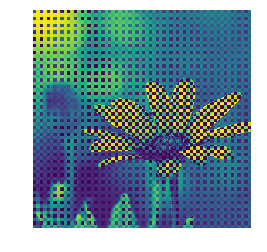

In [603]:
plt.imshow((mosaic_img).astype(np.uint8))
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

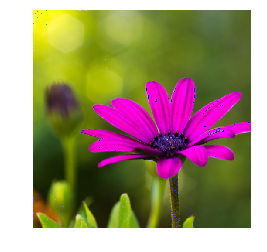

In [607]:
plt.imshow((recover_img).astype(np.uint8))
plt.axis('off')

The average per-pixel error for flower is: 63.9408125
The maximum per-pixel error for flower is: 48425.0


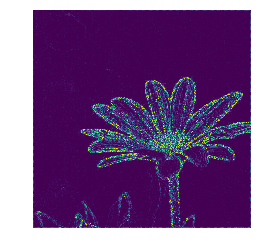

In [609]:
pp_err, max_err = compute_errors(recover_img, original_img)
print("The average per-pixel error for flower is: "+str(pp_err))
print("The maximum per-pixel error for flower is: "+str(max_err))

(-0.5, 1279.5, 1023.5, -0.5)

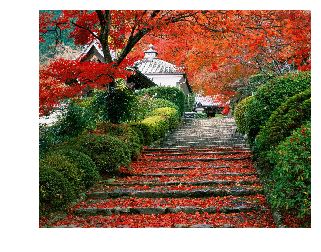

In [624]:
original_img1 = read_image('images/path.jpg')
mosaic_img1 = get_mosaic_image(original_img1)
recover_img1=get_freeman_solution_image(mosaic_img1)
plt.imshow((original_img1).astype(np.uint8))
plt.axis('off')

(-0.5, 1279.5, 1023.5, -0.5)

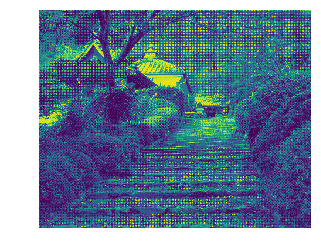

In [625]:
plt.imshow((mosaic_img1).astype(np.uint8))
plt.axis('off')

(-0.5, 1279.5, 1023.5, -0.5)

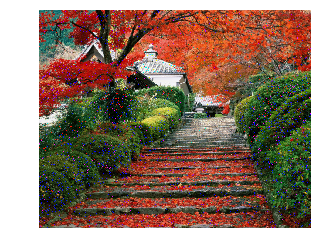

In [626]:
plt.imshow((recover_img1).astype(np.uint8))
plt.axis('off')

The average per-pixel error for path is: 537.5113709926605
The maximum per-pixel error for path is: 49284.375


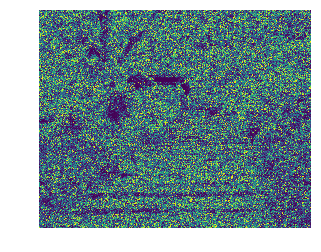

In [627]:
pp_err, max_err = compute_errors(recover_img1, original_img1)
print("The average per-pixel error for path is: "+str(pp_err))
print("The maximum per-pixel error for path is: "+str(max_err))

### Bonus Points

In [616]:
def get_freeman2_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    red=np.zeros(np.array(mosaic_img).shape)
    red[::2, ::2] = mosaic_img[::2, ::2]
    green=np.zeros(np.array(mosaic_img).shape)
    green[1::2, ::2] = mosaic_img[1::2, ::2]
    green[::2, 1::2] = mosaic_img[::2, 1::2]
    blue=np.zeros(np.array(mosaic_img).shape)
    blue[1::2, 1::2] = mosaic_img[1::2, 1::2] 
    
    k_green = np.array([[0,0.25,0],[0.25,0,0.25],[0,0.25,0]])
    conv_green=ndimage.convolve(green, k_green, mode='mirror')
    k_blue=np.array([[0.25,0.5,0.25],[0.5,0,0.5],[0.25,0.5,0.25]])
    conv_blue=ndimage.convolve(blue, k_blue, mode='mirror')
    k_red=np.array([[0.25,0.5,0.25],[0.5,0,0.5],[0.25,0.5,0.25]])
    conv_red=ndimage.convolve(red, k_red, mode='mirror')
    result_green=conv_green+green
    result_red=conv_red+red
    result_blue=conv_blue+blue

    filtered_red=result_green+scipy.signal.medfilt2d(result_red-result_green,kernel_size=5)
    filtered_blue=result_green+scipy.signal.medfilt2d(result_blue-result_green,kernel_size=5)
    
    mosaic_shape = np.shape(mosaic_img)
    freeman2_soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    freeman2_soln_image[:,:,0] =filtered_red
    freeman2_soln_image[:,:,1] =result_green
    freeman2_soln_image[:,:,2] =filtered_blue
    
    
    return freeman2_soln_image

(-0.5, 599.5, 479.5, -0.5)

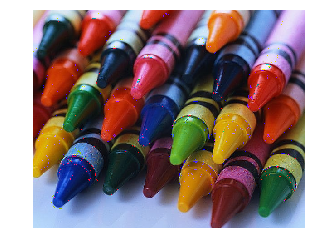

In [617]:
mosaic_img = read_image('images/crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for crayons is: 112.34364149305556
The maximum per-pixel error for crayons is: 47857.625


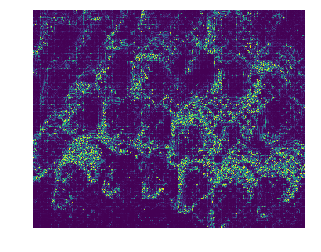

In [618]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 1199.5, 799.5, -0.5)

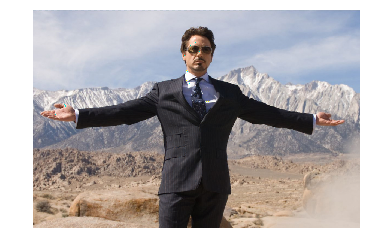

In [619]:
mosaic_img = read_image('images/tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for tony is: 15.508873828125
The maximum per-pixel error for tony is: 10873.5


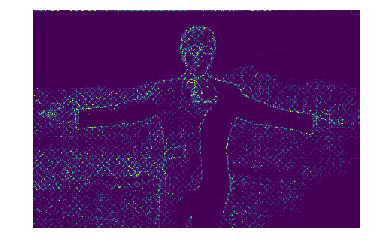

In [620]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

(-0.5, 2381.5, 1439.5, -0.5)

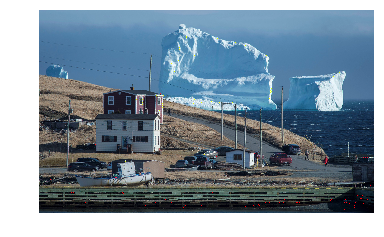

In [621]:
mosaic_img = read_image('images/iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow((soln_image).astype(np.uint8))
plt.axis('off')

The average per-pixel error for iceberg is: 67.79525049342872
The maximum per-pixel error for iceberg is: 33720.0625


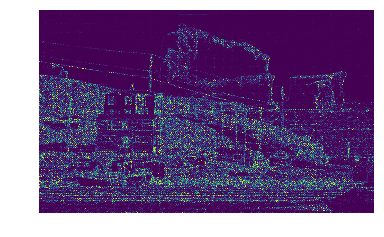

In [622]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))